#Snake Identifier


## Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [4]:
BASE_PATH ="/content/drive/MyDrive/data"

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = BASE_PATH+"/test/data.csv"
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
df['breed_encode'] = LE.fit_transform(df['breed'])

In [ ]:
#Test data
path = "/content/drive/MyDrive/data/data.csv"
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
df['breed_encode'] = LE.fit_transform(df['breed'])

In [ ]:
from IPython.display import Image
pathImgs = "/content/drive/MyDrive/data/images_samples/test/*.*"
#print(pathImgs)
#Image(filename=pathImgs, width=800)

In [26]:
import glob
import cv2

pathImgs = "/content/drive/MyDrive/data/test/data/*.*"

imgPath = []

for file in glob.glob(pathImgs):
  imgPath.append(file)

In [29]:
imgPath

['/content/drive/MyDrive/data/test/data/07a8b02069.jpg',
 '/content/drive/MyDrive/data/test/data/289dc74860.jpg',
 '/content/drive/MyDrive/data/test/data/461d5c01b8.jpg',
 '/content/drive/MyDrive/data/test/data/89c4bc8de3.jpg',
 '/content/drive/MyDrive/data/test/data/8b492b973d.jpg',
 '/content/drive/MyDrive/data/test/data/929b99ea92.jpg',
 '/content/drive/MyDrive/data/test/data/9b3c717213.jpg',
 '/content/drive/MyDrive/data/test/data/a57df436ac.jpg',
 '/content/drive/MyDrive/data/test/data/a8dcaf77bd.jpg',
 '/content/drive/MyDrive/data/test/data/a8122de0e8.jpg',
 '/content/drive/MyDrive/data/test/data/a8b3ad1dde.jpg',
 '/content/drive/MyDrive/data/test/data/b4b1201f20.jpg',
 '/content/drive/MyDrive/data/test/data/bbac7385e2.jpg',
 '/content/drive/MyDrive/data/test/data/d04b95dd67.jpg',
 '/content/drive/MyDrive/data/test/data/d7c292df19.jpg',
 '/content/drive/MyDrive/data/test/data/da4c31dc0d.jpg',
 '/content/drive/MyDrive/data/test/data/e433fefdae.jpg',
 '/content/drive/MyDrive/data/t

## Data exploration

- Main dataframe:

In [ ]:
df.head()

,image_id,breed,breed_encode
0,a8b3ad1dde,nerodia-erythrogaster,15
1,8b492b973d,pantherophis-vulpinus,25
2,929b99ea92,thamnophis-sirtalis,34
3,bbac7385e2,pantherophis-obsoletus,23
4,ef776b1488,agkistrodon-contortrix,0


- Data Size

In [ ]:
df.shape

(20865, 3)

- Breeds:

In [ ]:
print(pd.unique(df['breed']));
print("Total breeds",len ( pd.unique(df['breed'])));

['nerodia-erythrogaster' 'pantherophis-vulpinus' 'thamnophis-sirtalis'
 'pantherophis-obsoletus' 'agkistrodon-contortrix' 'crotalus-atrox'
 'lampropeltis-triangulum' 'crotalus-horridus' 'crotalus-ruber'
 'heterodon-platirhinos' 'nerodia-sipedon' 'thamnophis-elegans'
 'thamnophis-marcianus' 'crotalus-viridis' 'nerodia-fasciata'
 'haldea-striatula' 'storeria-dekayi' 'agkistrodon-piscivorus'
 'nerodia-rhombifer' 'storeria-occipitomaculata' 'thamnophis-radix'
 'coluber-constrictor' 'natrix-natrix' 'diadophis-punctatus'
 'masticophis-flagellum' 'pantherophis-spiloides' 'rhinocheilus-lecontei'
 'lampropeltis-californiae' 'pituophis-catenifer' 'opheodrys-aestivus'
 'pantherophis-guttatus' 'pantherophis-alleghaniensis'
 'thamnophis-proximus' 'pantherophis-emoryi' 'crotalus-scutulatus']
Total breeds 35


- Total images for each breed : 

In [ ]:
print(df['breed'].value_counts())

thamnophis-sirtalis            972
storeria-dekayi                883
crotalus-atrox                 837
pantherophis-obsoletus         813
pituophis-catenifer            735
lampropeltis-triangulum        698
nerodia-sipedon                691
agkistrodon-contortrix         644
diadophis-punctatus            631
agkistrodon-piscivorus         631
pantherophis-alleghaniensis    616
nerodia-erythrogaster          616
lampropeltis-californiae       611
opheodrys-aestivus             609
coluber-constrictor            591
heterodon-platirhinos          586
pantherophis-guttatus          580
crotalus-horridus              577
natrix-natrix                  573
masticophis-flagellum          553
haldea-striatula               550
storeria-occipitomaculata      540
nerodia-rhombifer              536
thamnophis-proximus            536
rhinocheilus-lecontei          527
crotalus-scutulatus            503
crotalus-ruber                 503
thamnophis-radix               501
pantherophis-vulpinu

- Datad density:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


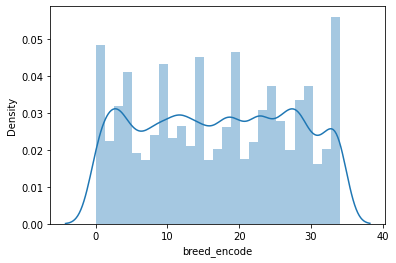

In [ ]:
sns.distplot(df['breed_encode']);

- Histogram:

(array([2703., 1583., 2225., 1862., 1644., 2452., 1853., 2244., 1861.,
        2438.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

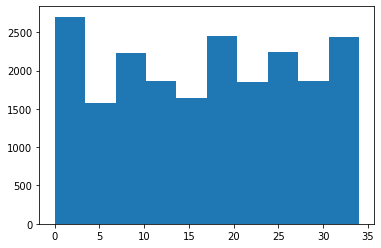

In [ ]:
plt.hist(df['breed_encode'])

## Training:

-Split data

In [ ]:
y=df['breed']

(20865,)

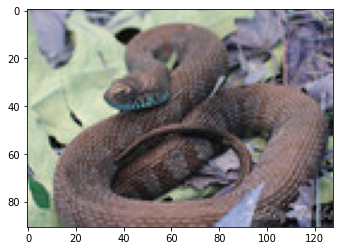

In [ ]:
plt.imshow(images[0])

In [ ]:
i = np.random.randint(len(y))
print(y[i])
print(df['image_id'][i])

lampropeltis-triangulum
c5ad0eeff6


In [11]:
df.head(10)

,image_id,breed,breed_encode
0,a8b3ad1dde,nerodia-erythrogaster,6
1,8b492b973d,pantherophis-vulpinus,11
2,929b99ea92,thamnophis-sirtalis,15
3,bbac7385e2,pantherophis-obsoletus,10
4,ef776b1488,agkistrodon-contortrix,0
5,d04b95dd67,thamnophis-sirtalis,15
6,a57df436ac,crotalus-ruber,3
7,89c4bc8de3,heterodon-platirhinos,5
8,d7c292df19,nerodia-sipedon,9
9,a8122de0e8,thamnophis-elegans,13


In [17]:
df

,image_id,breed,breed_encode
0,a8b3ad1dde,nerodia-erythrogaster,6
1,8b492b973d,pantherophis-vulpinus,11
2,929b99ea92,thamnophis-sirtalis,15
3,bbac7385e2,pantherophis-obsoletus,10
4,ef776b1488,agkistrodon-contortrix,0
5,d04b95dd67,thamnophis-sirtalis,15
6,a57df436ac,crotalus-ruber,3
7,89c4bc8de3,heterodon-platirhinos,5
8,d7c292df19,nerodia-sipedon,9
9,a8122de0e8,thamnophis-elegans,13


In [108]:
BASE_PATH = "/content/drive/MyDrive/data/test/data"

images= []
tf_images =np.zeros((len(df['image_id']),224,224,3))
for i,image_id in enumerate(df['image_id']):
  path  = BASE_PATH+image_id+".*"
  route = glob.glob(path,recursive=False)
  if len(route) <= 0:
    print("Path not found")
    print(path)
    break
  img = cv2.imread(route[0])
  tf_images[i,:,:,:] =resize(image = img, output_shape = [224,224,3], anti_aliasing=True)  

Path not found
/content/drive/MyDrive/data/test/dataa8b3ad1dde.*
